In [1]:
from copy import deepcopy
from time import time
import numpy as np
from HARK.utilities import plotFuncs
from HARK.ConsumptionSaving.ConsIndShockModel import (
    init_idiosyncratic_shocks
)

from HARK.ConsumptionSaving.ConsRepAgentModel import (
    RepAgentConsumerType,
    RepAgentMarkovConsumerType,
)

This module contains models for solving representative agent (RA) macroeconomic models. This stands in contrast to all other model modules in HARK, which (unsurprisingly) take a heterogeneous agents approach.  
In RA models, all attributes are either time invariant or exist on a short cycle. Also, models must be infinite horizon.

The agent's problem can be written in Bellman form as:

\begin{eqnarray*}
v_t(M_t,p_t, medShk_t) &=& \max_{c_t, med_t} U(c_t, med_t) + \beta (1-\mathsf{D}_{t+1}) \mathbb{E} [v_{t+1}(M_{t+1}, p_{t+1}, medShk_{t+1})], \\
a_t &=& M_t - c_t, \\
a_t &\geq& \underline{a}, \\
M_{t+1} &=& R a_t + \theta_{t+1}, \\
p_{t+1} &=& \gimel_{t+1}(p_t)\psi_{t+1}, \\
medShk_{t+1} &=&   ,\\
\psi_t \sim F_{\psi t} &\qquad&  \theta_t \sim F_{\theta t}, \mathbb{E} [F_{\psi t}] = 1, \\
U(c, med) &=& \frac{c^{1-\rho}}{1-\rho}\frac{med^{1-\rho_{med}}}{1-\rho_{med}}.
\end{eqnarray*}

The one period problem for this model is solved by the function $\texttt{solveConsMedShock}$, which creates an instance of the class $\texttt{ConsMedShockSolver}$. The class $\texttt{MedShockConsumerType}$ extends $\texttt{PersistentShockConsumerType}$ from $\texttt{GenIncProcessModel}$ to represents agents in this model.

In [2]:
# Make a quick example dictionary
RA_params = deepcopy(init_idiosyncratic_shocks)
RA_params["DeprFac"] = 0.05
RA_params["CapShare"] = 0.36
RA_params["UnempPrb"] = 0.0
RA_params["LivPrb"] = [1.0]

Solving a representative agent problem took 0.16985440254211426 seconds.


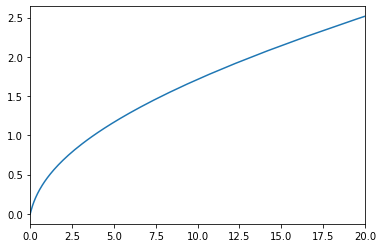

In [3]:
# Make and solve a rep agent model
RAexample = RepAgentConsumerType(**RA_params)
t_start = time()
RAexample.solve()
t_end = time()
print(
    "Solving a representative agent problem took " + str(t_end - t_start) + " seconds."
)
plotFuncs(RAexample.solution[0].cFunc, 0, 20)

In [4]:
# Simulate the representative agent model
RAexample.T_sim = 2000
RAexample.track_vars = ["cNrmNow", "mNrmNow", "Rfree", "wRte"]
RAexample.initializeSim()
t_start = time()
RAexample.simulate()
t_end = time()
print(
    "Simulating a representative agent for "
    + str(RAexample.T_sim)
    + " periods took "
    + str(t_end - t_start)
    + " seconds."
)

Simulating a representative agent for 2000 periods took 1.7260756492614746 seconds.


Solving a two state representative agent problem took 0.4269294738769531 seconds.


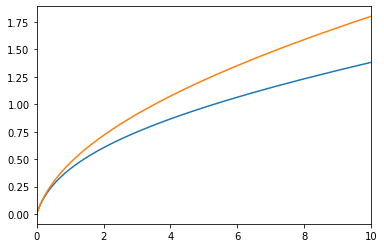

In [5]:
# Make and solve a Markov representative agent
RA_markov_params = deepcopy(RA_params)
RA_markov_params["PermGroFac"] = [[0.97, 1.03]]
RA_markov_params["MrkvArray"] = np.array([[0.99, 0.01], [0.01, 0.99]])
RA_markov_params["MrkvNow"] = 0
RAmarkovExample = RepAgentMarkovConsumerType(**RA_markov_params)
RAmarkovExample.IncomeDstn[0] = 2 * [RAmarkovExample.IncomeDstn[0]]
t_start = time()
RAmarkovExample.solve()
t_end = time()
print(
    "Solving a two state representative agent problem took "
    + str(t_end - t_start)
    + " seconds."
)
plotFuncs(RAmarkovExample.solution[0].cFunc, 0, 10)

In [6]:
# Simulate the two state representative agent model
RAmarkovExample.T_sim = 2000
RAmarkovExample.track_vars = ["cNrmNow", "mNrmNow", "Rfree", "wRte", "MrkvNow"]
RAmarkovExample.initializeSim()
t_start = time()
RAmarkovExample.simulate()
t_end = time()
print(
    "Simulating a two state representative agent for "
    + str(RAexample.T_sim)
    + " periods took "
    + str(t_end - t_start)
    + " seconds."
)

Simulating a two state representative agent for 2000 periods took 2.1404101848602295 seconds.
